# USER SIMILARITY BASED RECOMMENDER

Development of a user-based machine learning to recommend books that user still don't read but users with similar caracteres already read and liked them.

The used datasets are abled to download on [link](http://www2.informatik.uni-freiburg.de/~cziegler/BX/)

In [77]:
# libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors

In [78]:
# loading data
avaliacoes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Recommendation Systems/Datasets/BX-Book-Ratings.csv', encoding='latin', sep=';', error_bad_lines=False)
livros =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Recommendation Systems/Datasets/BX-Books.csv', encoding='latin', sep=';', error_bad_lines=False)
usuarios = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Recommendation Systems/Datasets/BX-Users.csv', encoding='latin', sep=';', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 

## Data Cleaning

In [79]:
usuarios.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [80]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [81]:
# cleaning users database
usuarios = usuarios.drop(labels=['Location', 'Age'], axis=1)

In [82]:
livros.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [83]:
livros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [84]:
# cleaning books database
livros = livros.drop(labels=['Year-Of-Publication',	'Publisher',	'Image-URL-S',	'Image-URL-L'], axis=1)
livros.info()                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         271360 non-null  object
 1   Book-Title   271360 non-null  object
 2   Book-Author  271359 non-null  object
 3   Image-URL-M  271360 non-null  object
dtypes: object(4)
memory usage: 8.3+ MB


In [85]:
avaliacoes.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Pré-Processing

Because of hardware and computational limitations, I reduced the dataframe's lenght the way that it have only users informations that ranked at least 150 books

In [86]:
# reducing the databases's lenght
ids = avaliacoes['User-ID'].value_counts() >= 150
aux = ids[ids].index
avaliacoes = avaliacoes[avaliacoes['User-ID'].isin(aux)]

In [87]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584294 entries, 1456 to 1149637
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      584294 non-null  int64 
 1   ISBN         584294 non-null  object
 2   Book-Rating  584294 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 17.8+ MB


In this part, I merge the informations as: ISBN, Book-Title, Book-Author, User-ID and Book-Rating from users, books and ranking turning it into a unique dataframe. As the model is based on users similarity, only the features mentioned above are necessary o modelo é baseado na semelhança entre usuários, apenas os atributos mencionados acima serão necessários. 

In [88]:
# merging cleared databases
livros_avaliacoes = pd.merge(livros, avaliacoes, on='ISBN')
livros_avaliacoes

,ISBN,Book-Title,Book-Author,Image-URL-M,User-ID,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,85526,0
2,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,96054,0
3,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,177458,0
4,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,263325,6
...,...,...,...,...,...,...
540794,1582380805,Tropical Rainforests: 230 Species in Full Colo...,"Allen M., Ph.D. Young",http://images.amazon.com/images/P/1582380805.0...,275970,0
540795,1845170423,Cocktail Classics,David Biggs,http://images.amazon.com/images/P/1845170423.0...,275970,7
540796,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,http://images.amazon.com/images/P/006008667X.0...,276680,0
540797,0192126040,Republic (World's Classics),Plato,http://images.amazon.com/images/P/0192126040.0...,276680,0


In [89]:
# dropping unecessary features
base_de_dados = livros_avaliacoes.drop(labels=['ISBN', 'Book-Author'], axis=1)
base_de_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540799 entries, 0 to 540798
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Book-Title   540799 non-null  object
 1   Image-URL-M  540799 non-null  object
 2   User-ID      540799 non-null  int64 
 3   Book-Rating  540799 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 20.6+ MB


In [90]:
base_de_dados.head()

,Book-Title,Image-URL-M,User-ID,Book-Rating
0,Clara Callan,http://images.amazon.com/images/P/0002005018.0...,11676,8
1,Clara Callan,http://images.amazon.com/images/P/0002005018.0...,85526,0
2,Clara Callan,http://images.amazon.com/images/P/0002005018.0...,96054,0
3,Clara Callan,http://images.amazon.com/images/P/0002005018.0...,177458,0
4,Clara Callan,http://images.amazon.com/images/P/0002005018.0...,263325,6


This way we can link the User-ID of each user as the table index, the books as features and the rankings as the values.

In [91]:
df_recomendacao = pd.pivot_table(data=base_de_dados, index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)
df_recomendacao

Book-Title,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Always Have Popsicles,Apple Magic (The Collector's series),Beyond IBM: Leadership Marketing and Finance for the 1990s,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),Dark Justice,Deceived,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",Final Fantasy Anthology: Official Strategy Guide (Brady Games),Flight of Fancy: American Heiresses (Zebra Ballad Romance),...,"Ã?ber den Wunsch, sich wohlzufÃ¼hlen: Geschichten",Ã?coute ma diffÃ©rence (Le Temps des femmes),Ã?ngeles fugaces (Falling Angels),Ã?Â?. Kolumnen.,Ã?Â?ber das Fernsehen.,Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.,Ã?Â?lpiraten.,Ã?Â?rger mit Produkt X. Roman.,Ã?Â?stlich der Berge.,Ã?Â?thique en toc
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df_recomendacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 254 to 278418
Columns: 170375 entries,  A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America) to Ã?Â?thique en toc
dtypes: float64(170375)
memory usage: 1.6 GB


## Machine Learning

In [93]:
# k-nearest neighbors
knn_model_user = NearestNeighbors(metric='cosine')

# fitting the model to dataset
knn_model_user.fit(df_recomendacao)

NearestNeighbors(metric='cosine')

In [94]:
import random

# random choice of the user by index
i_user = random.randint(0,len(df_recomendacao))

# getting the users similarity and their index
dist, i_similar_user = knn_model_user.kneighbors(df_recomendacao.iloc[i_user].values.reshape(1,-1), n_neighbors=6)

# getting the user ID
user = df_recomendacao.index[i_user]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


In [95]:
# looking the similar users and each similarity
for i in range(0,len(dist.flatten())):
  if i == 0:
    print(f'USUARIO: {user}\n\n')
  else:
    print(f'similar{i}:{df_recomendacao.index[i_similar_user.flatten()[i]]}, dist: {dist.flatten()[i]}')

USUARIO: 251422


similar1:56554, dist: 0.8821455674050732
similar2:164027, dist: 0.9116278251354895
similar3:25409, dist: 0.9217443820565878
similar4:105979, dist: 0.9249165808439243
similar5:93426, dist: 0.9263842867507521


As the model used is the k-nearest neighbors based on cosine distance. The lowest value of 'dist' displays the closer similarity

In [96]:
# similar-user ID
similar_user = df_recomendacao.index[i_similar_user.flatten()[1]]

In [97]:
# creating user and similar-user dataframes
df_user = df_recomendacao.loc[user].to_frame()
df_similar_user = df_recomendacao.loc[similar_user].to_frame()

In [98]:
# merging the dataframes
df_livros = pd.merge(df_user, df_similar_user, on='Book-Title').sort_values(by=similar_user, ascending=False)
df_livros = pd.merge(df_livros, base_de_dados, on='Book-Title').drop_duplicates(subset=['Book-Title'])
df_livros

,Book-Title,251422,56554,Image-URL-M,User-ID,Book-Rating
0,The Wedding,0.0,10.0,http://images.amazon.com/images/P/0446532452.0...,7158,8
102,Miss Julia Takes over,0.0,10.0,http://images.amazon.com/images/P/0142000892.0...,6543,0
134,Miss Julia Meets Her Match,0.0,10.0,http://images.amazon.com/images/P/067003293X.0...,56554,10
139,Miss Julia Hits the Road (Southern Comedy of M...,0.0,10.0,http://images.amazon.com/images/P/0670032077.0...,7346,8
152,The Jester,0.0,10.0,http://images.amazon.com/images/P/0316602051.0...,277427,0
...,...,...,...,...,...,...
540787,Heart of the Buddha's Teaching: Transforming S...,0.0,0.0,http://images.amazon.com/images/P/0938077813.0...,246655,0
540788,Heart of the Christos: Starseeding from the Pl...,0.0,0.0,http://images.amazon.com/images/P/0939680599.0...,233911,8
540789,Heart of the Comet,0.0,0.0,http://images.amazon.com/images/P/0553258397.0...,87141,0
540797,Heart of the Condor (Seduction Romance (Paperb...,0.0,0.0,http://images.amazon.com/images/P/0515133353.0...,98391,8


## Recommending to an user

Set a business rule is necessary to make it because we couldn't recommend a book that the user already read. Besides it, the similar-user need to rank the book with a rate at least 5 to recommend it to the user

In [99]:
# Setting business rule
df_livros = df_livros[(df_livros[similar_user]>= 5) & (df_livros[user]==0) & (df_livros['User-ID']==similar_user)].reset_index()
df_livros = df_livros.drop(labels=['User-ID','Book-Rating'], axis=1)
df_livros

,index,Book-Title,251422,56554,Image-URL-M
0,134,Miss Julia Meets Her Match,0.0,10.0,http://images.amazon.com/images/P/067003293X.0...
1,564,Moon Women,0.0,10.0,http://images.amazon.com/images/P/0385335210.0...
2,794,Plant Life,0.0,10.0,http://images.amazon.com/images/P/0385335237.0...
3,1090,Ground Zero Files (X-Files),0.0,10.0,http://images.amazon.com/images/P/006105223X.0...
4,1165,Party Girls,0.0,10.0,http://images.amazon.com/images/P/0758201966.0...
5,1404,Girls' Night Out,0.0,10.0,http://images.amazon.com/images/P/0758201982.0...
6,1741,My Life Uncovered (Red Dress Ink),0.0,10.0,http://images.amazon.com/images/P/0373250436.0...
7,1767,Diary Of A Blues Goddess (Red Dress Ink (Paper...,0.0,9.0,http://images.amazon.com/images/P/0373250320.0...
8,1846,Emerald,0.0,9.0,http://images.amazon.com/images/P/044920099X.0...
9,2635,X Files #01 X Marks the Spot (X Files Middle G...,0.0,9.0,http://images.amazon.com/images/P/006440613X.0...


In [100]:
# now the dictionary is showing the recommended books to the random user based on his most similar user
books = list(df_livros['Book-Title'][:6])
notas = list(df_livros[similar_user][:6])
urls = list(df_livros['Image-URL-M'][:6])

recomendar = {'Livro':books,
              'nota': notas,
              'url': urls}
recomendar

{'Livro': ['Miss Julia Meets Her Match',
  'Moon Women',
  'Plant Life',
  'Ground Zero Files (X-Files)',
  'Party Girls',
  "Girls' Night Out"],
 'nota': [10.0, 10.0, 10.0, 10.0, 10.0, 10.0],
 'url': ['http://images.amazon.com/images/P/067003293X.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0385335210.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0385335237.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/006105223X.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0758201966.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0758201982.01.MZZZZZZZ.jpg']}

USER: 251422
-----------------------------------------------------------------------
BOOKS RECOMMENDEDS TO USER
-----------------------------------------------------------------------
Miss Julia Meets Her Match
Moon Women
Plant Life
Ground Zero Files (X-Files)
Party Girls
Girls' Night Out
-----------------------------------------------------------------------


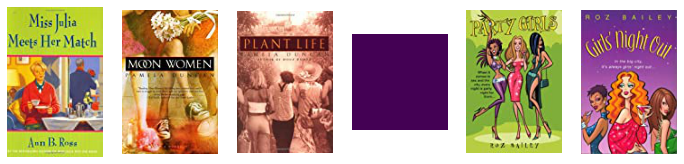

In [101]:
from skimage import io
  
print(f'USER: {user}')
print('-----------------------------------------------------------------------')
print('BOOKS RECOMMENDEDS TO USER')
print('-----------------------------------------------------------------------')
for i in range(0, len(books)):
  print(books[i])
print('-----------------------------------------------------------------------')
for pos in range(0, len(urls)):
  image = io.imread(urls[pos])
  plt.subplot(1, len(urls), pos+1)
  plt.imshow(image)
  plt.axis('off')
  #plt.show()